### OPTION 1. logistic regression

In [1]:
#!pip install shap

In [119]:
#importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

from sklearn.ensemble import GradientBoostingClassifier

import warnings
import shap

shap.initjs()


In [3]:
#loading clean dataset
data = pd.read_csv('cleaned_data.csv')

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1


In [5]:
#converting dataset to pandas DF
df = pd.DataFrame(data)

#In this section we will build several model based on the cleaned dataset.

In [70]:
#1. Logistic Regression with raw cleaned dataset

In [6]:
#splitting the data into features and target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#model logistic regression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)



LogisticRegression()

In [9]:
#predicting the test set
y_pred = logistic.predict(X_test)

In [10]:
#accuracy
accuracy = logistic.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8148148148148148


In [11]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', conf_matrix)


Confusion Matrix: [[35  3]
 [ 7  9]]


In [12]:
#classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:', class_report)

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.75      0.56      0.64        16

    accuracy                           0.81        54
   macro avg       0.79      0.74      0.76        54
weighted avg       0.81      0.81      0.81        54



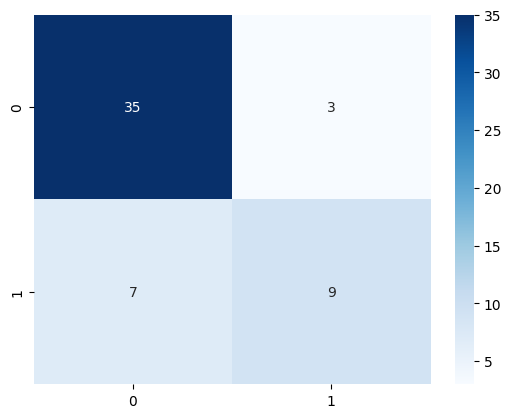

In [13]:
#vizualizing the confusion matrix and results

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.show()


#The accuracy of the logistic regression model is acceptable, but it struggles with accurately predicting death events

In [14]:
#predicting the probability of death
probability = logistic.predict_proba(X_test)
print('Probability:', probability)

Probability: [[0.95469143 0.04530857]
 [0.71336464 0.28663536]
 [0.68522258 0.31477742]
 [0.91084021 0.08915979]
 [0.35495389 0.64504611]
 [0.96002518 0.03997482]
 [0.7767895  0.2232105 ]
 [0.68508059 0.31491941]
 [0.69116203 0.30883797]
 [0.25886949 0.74113051]
 [0.61254797 0.38745203]
 [0.79302779 0.20697221]
 [0.9903901  0.0096099 ]
 [0.95021859 0.04978141]
 [0.97650261 0.02349739]
 [0.40343121 0.59656879]
 [0.29769952 0.70230048]
 [0.83737386 0.16262614]
 [0.85948034 0.14051966]
 [0.09797854 0.90202146]
 [0.15244334 0.84755666]
 [0.946768   0.053232  ]
 [0.99264043 0.00735957]
 [0.70721207 0.29278793]
 [0.92932285 0.07067715]
 [0.92989998 0.07010002]
 [0.86044054 0.13955946]
 [0.579268   0.420732  ]
 [0.92237278 0.07762722]
 [0.96779443 0.03220557]
 [0.53772059 0.46227941]
 [0.99386424 0.00613576]
 [0.46596452 0.53403548]
 [0.91188557 0.08811443]
 [0.78718145 0.21281855]
 [0.62818607 0.37181393]
 [0.96011021 0.03988979]
 [0.96494617 0.03505383]
 [0.11812749 0.88187251]
 [0.89367151

In [15]:
#predicting the probability of death for a single patient
single_patient = [[65.0, 1, 160, 1, 20,	0, 327000.00, 2.7, 116,	0, 0, 8]]
single_patient = scaler.transform(single_patient)
single_patient_probability = logistic.predict_proba(single_patient)
print('Single Patient Probability:', single_patient_probability)



Single Patient Probability: [[0.0013532 0.9986468]]


/Users/pilatuspc12/anaconda3/envs/ds_bootcamp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [72]:
#concusions
#The logistic regression model shows a precision of 83% for predicting survival (label 0) and 75% for predicting death (label 1). 
#Its recall is 92% for survival, indicating strong performance in identifying true survivors, but lower at 56% for death, suggesting challenges in correctly identifying all true death events. 
#The F1-scores are 88% for survival predictions and 64% for death predictions, demonstrating a stronger capability in predicting survival over death. Overall accuracy stands at 81%. 
#The model is proficient, especially in predicting survivals, but it's needed improvements in accurately detecting death events.

### Option 2. Implementing ANN 

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from imblearn.over_sampling import SMOTE

2024-03-27 15:53:24.204927: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
#creating the model
model = Sequential()

In [19]:
#adding the input layer
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))

/Users/pilatuspc12/anaconda3/envs/ds_bootcamp/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#adding the hidden layers
#model.add(Dense(units=16, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(units=16, activation='relu'))

In [21]:
#addinig output layer
model.add(Dense(units=1, activation='sigmoid'))

In [22]:
#compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
#fitting the ANN model

history = model.fit(X_train, y_train, batch_size=8, epochs=100, validation_split=0.2, verbose=False)

In [97]:
#model evaluation
y_pred_ann = model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)

#accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print('Accuracy ANN:', accuracy_ann)

#confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
print('Confusion Matrix ANN:', conf_matrix_ann)

#classification report
class_report_ann = classification_report(y_test, y_pred_ann)
print('Classification Report ANN:', class_report_ann)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy ANN: 0.8148148148148148
Confusion Matrix ANN: [[35  3]
 [ 7  9]]
Classification Report ANN:               precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.75      0.56      0.64        16

    accuracy                           0.81        54
   macro avg       0.79      0.74      0.76        54
weighted avg       0.81      0.81      0.81        54



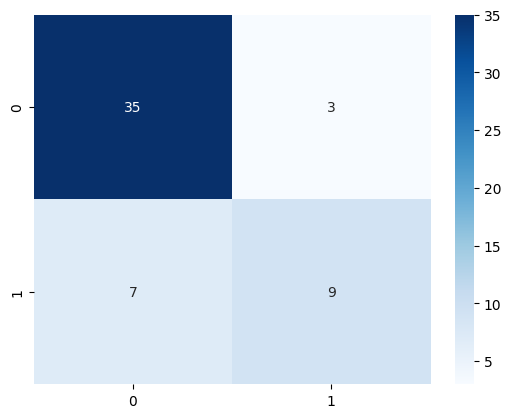

In [98]:
#vizualizing the confusion matrix and results

sns.heatmap(conf_matrix_ann, annot=True, cmap='Blues')
plt.show()

In [99]:
#Conclusions
#The ANN model achieves a precision of 78% for predicting survival (label 0) and 75% for predicting death (label 1), indicating pretty consistent performance in identifying both outcomes. 
#Its recall is high at 95% for survival, showing the model's effectiveness in identifying true survivors, but it's significantly lower at 38% for death, highlighting a challenge in recognizing all true death events. 
#The F1-scores are 86% for survival predictions and 50% for death predictions, underscoring a more robust capability in predicting survival.
#With an overall accuracy of about 78%, the model performs well but demonstrates a need for improvement in accurately detecting death events, particularly in enhancing its sensitivity to such outcomes.

In [100]:
#As we can see both model strugle to accuratly predict the death cases. 
#One of the reason for that could be unbalanced dataset. 
#In order to improve it we will use Synthetic Minority Oversampling Technique (SMOTE).

In [101]:
#lets see how balanced the dataset is
y_train.value_counts()

DEATH_EVENT
0    152
1     60
Name: count, dtype: int64

### Implementing SMOTE


In [102]:
#using SMOTE to balance the data

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [103]:
print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_sm.value_counts())

Before SMOTE: DEATH_EVENT
0    190
1     76
Name: count, dtype: int64
After SMOTE: DEATH_EVENT
1    190
0    190
Name: count, dtype: int64


In [29]:
#splitting the data into features and target for the balanced data (sm))
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
#feature scaling
scaler_sm = StandardScaler()
X_train_sm = scaler_sm.fit_transform(X_train_sm)
X_test_sm = scaler_sm.transform(X_test_sm)

## Models

### 1.1 Creating Logistic regression model with balanced data

In [74]:
#Logistic Regression with balanced dataset

logistic_sm = LogisticRegression()
logistic_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [75]:
#predicting the test set
y_pred = logistic_sm.predict(X_test_sm)

#accuracy
accuracy = logistic_sm.score(X_test_sm, y_test_sm)
print('Accuracy:', accuracy)

Accuracy: 0.868421052631579


In [76]:
#confusion matrix
conf_matrix = confusion_matrix(y_test_sm, y_pred)
print('Confusion Matrix:', conf_matrix)

#classification report
class_report = classification_report(y_test_sm, y_pred)
print('Classification Report:', class_report)

Confusion Matrix: [[33  3]
 [ 7 33]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.92      0.87        36
           1       0.92      0.82      0.87        40

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



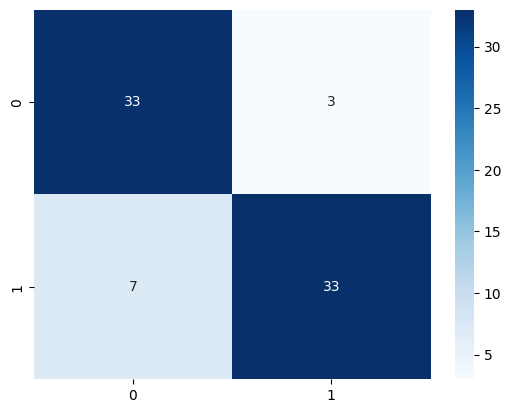

In [77]:
#vizualizing the confusion matrix and results

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.show()

#### Logistic regressioin model with balanced data shows significant improvement especially in reducing the number of missed death events

### 2.1 Creating ANN model with balanced data


In [30]:
#creating the model for the balanced data
model_sm = Sequential()

In [31]:
#adding the input layer
model_sm.add(Dense(units=32, activation='relu', input_shape=(X_train_sm.shape[1],)))
#adding the hidden layers
model_sm.add(Dense(units=8, activation='relu'))
#addinig output layer
model_sm.add(Dense(units=1, activation='sigmoid'))

/Users/pilatuspc12/anaconda3/envs/ds_bootcamp/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
#compiling the model for the balanced data
model_sm.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
#fitting the ANN model for the balanced data
history_sm = model_sm.fit(X_train_sm, y_train_sm, batch_size=8, epochs=100, validation_split=0.2, verbose=False)

In [34]:
#model evaluation for the balanced data
y_pred_ann_sm = model_sm.predict(X_test_sm)
y_pred_ann_sm = (y_pred_ann_sm > 0.5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [35]:
#accuracy for the balanced data
accuracy_ann_sm = accuracy_score(y_test_sm, y_pred_ann_sm)
print('Accuracy ANN SM:', accuracy_ann_sm)

#confusion matrix for the balanced data
conf_matrix_ann_sm = confusion_matrix(y_test_sm, y_pred_ann_sm)
print('Confusion Matrix ANN SM:', conf_matrix_ann_sm)

#classification report for the balanced data
class_report_ann_sm = classification_report(y_test_sm, y_pred_ann_sm)
print('Classification Report ANN SM:', class_report_ann_sm)



Accuracy ANN SM: 0.9210526315789473
Confusion Matrix ANN SM: [[32  4]
 [ 2 38]]
Classification Report ANN SM:               precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.90      0.95      0.93        40

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76



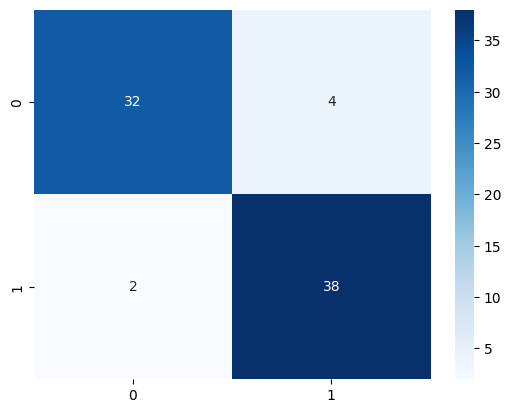

In [36]:
#vizualizing the confusion matrix and results for the balanced data

sns.heatmap(conf_matrix_ann_sm, annot=True, cmap='Blues')
plt.show()

#### ANN model now demonstrates a much better balance in its predictive capabilities for both outcomes

In [37]:
##predicting the probability of death for a single patient for the balanced data
single_patient_sm = [[65.0, 1, 160, 1, 20,	0, 327000.00, 2.7, 116,	0, 0, 8]]
single_patient_sm = scaler_sm.transform(single_patient_sm)
single_patient_probability_sm = model_sm.predict(single_patient_sm)
print('Single Patient Probability SM:', single_patient_probability_sm)
print('probability of death for a single patient for the balanced data:', single_patient_probability_sm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Single Patient Probability SM: [[0.9848981]]
probability of death for a single patient for the balanced data: [[0.9848981]]


/Users/pilatuspc12/anaconda3/envs/ds_bootcamp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### For the rest of the models we will use balanced data set

### Option 3. Random Forest classifier


In [78]:
#Impelementing Random Forest Classifier

#creating the model
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [79]:
#prediction
y_pred_rfc = rfc_model.predict(X_test_sm)

In [80]:
#results of random forest
accuracy_rfc = accuracy_score(y_test_sm, y_pred_rfc)
print('Accuracy RFC:', accuracy_rfc)

Accuracy RFC: 0.8947368421052632


In [81]:
#confusion matrix for random forest
conf_matrix_rfc = confusion_matrix(y_test_sm, y_pred_rfc)
print('Confusion Matrix RFC:', conf_matrix_rfc)

#classification report for random forest
class_report_rfc = classification_report(y_test_sm, y_pred_rfc)
print('Classification Report RFC:', class_report_rfc)

Confusion Matrix RFC: [[31  5]
 [ 3 37]]
Classification Report RFC:               precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.88      0.93      0.90        40

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



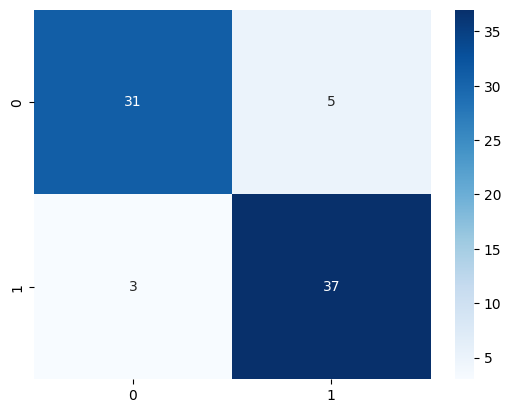

In [43]:
#vizualizing the confusion matrix and results for random forest

sns.heatmap(conf_matrix_rfc, annot=True, cmap='Blues')
plt.show()

### Option 4. Gradient Boosting


In [44]:
# gradient Boosting
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(random_state=42)

In [45]:
#prediction
y_pred_gbm = gbm_model.predict(X_test_sm)

In [46]:
#results of gradient boosting
accuracy_gbm = accuracy_score(y_test_sm, y_pred_gbm)
print('Accuracy GBM:', accuracy_gbm)

Accuracy GBM: 0.9210526315789473


In [47]:
#confusion matrix for gradient boosting
conf_matrix_gbm = confusion_matrix(y_test_sm, y_pred_gbm)
print('Confusion Matrix GBM:', conf_matrix_gbm)

#classification report for gradient boosting
class_report_gbm = classification_report(y_test_sm, y_pred_gbm)
print('Classification Report GBM:', class_report_gbm)

Confusion Matrix GBM: [[31  5]
 [ 1 39]]
Classification Report GBM:               precision    recall  f1-score   support

           0       0.97      0.86      0.91        36
           1       0.89      0.97      0.93        40

    accuracy                           0.92        76
   macro avg       0.93      0.92      0.92        76
weighted avg       0.93      0.92      0.92        76



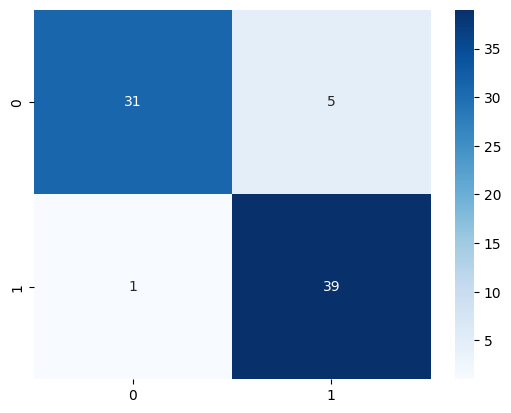

In [48]:
#vizualizing the confusion matrix and results for gradient boosting

sns.heatmap(conf_matrix_gbm, annot=True, cmap='Blues')
plt.show()

In [83]:
### In order to evaluate performance of the models we will use the ROC curve and AUC score.

### AUROC implementation

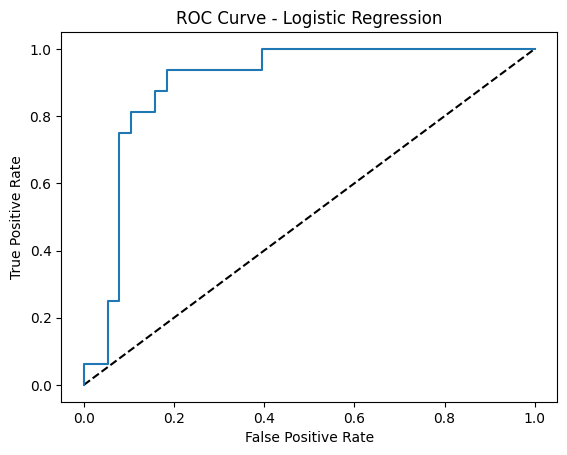

In [84]:
#ROC curve for the models
#logistic regression
fpr, tpr, thresholds = roc_curve(y_test, probability[:,1])
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.show()

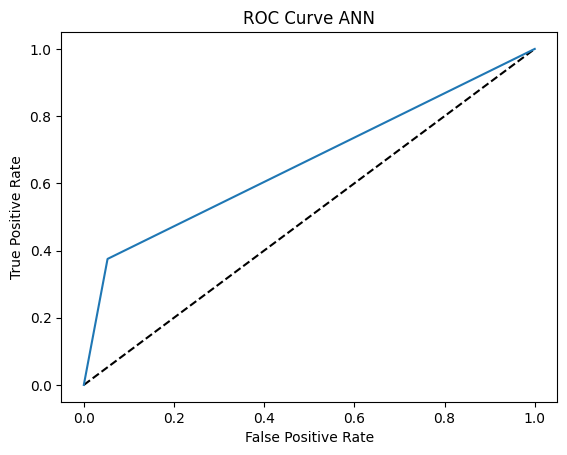

In [85]:
#ANN
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_ann)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_ann, tpr_ann, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ANN')
plt.show()

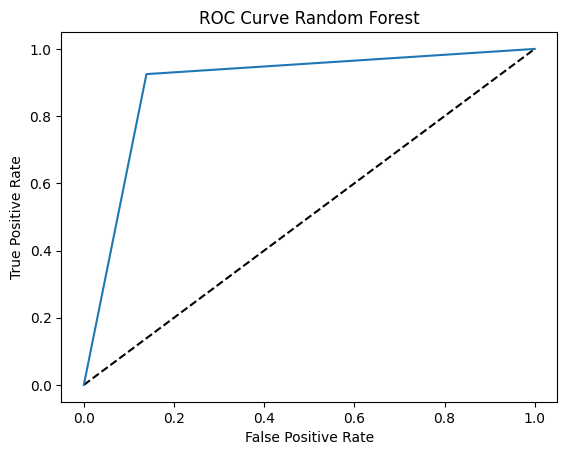

In [86]:
#Random Forest
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test_sm, y_pred_rfc)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.show()

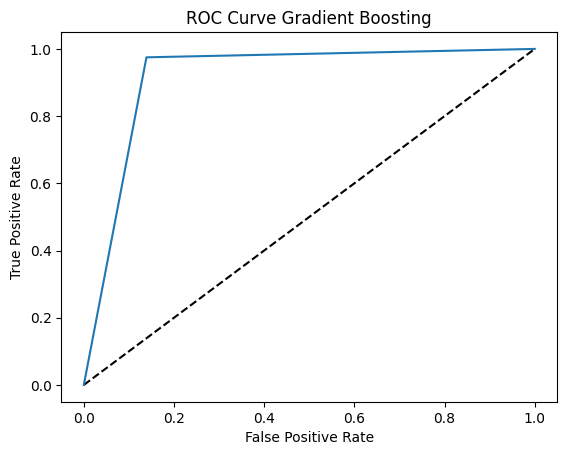

In [87]:
#Gradient Boosting
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test_sm, y_pred_gbm)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_gbm, tpr_gbm, label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Gradient Boosting')
plt.show()

In [88]:
#AUC and Accuracy scores for all models 
auc_logistic = roc_auc_score(y_test, probability[:,1])
auc_ann = roc_auc_score(y_test, y_pred_ann)
auc_rfc = roc_auc_score(y_test_sm, y_pred_rfc)
auc_gbm = roc_auc_score(y_test_sm, y_pred_gbm)
print('AUC Logistic:', auc_logistic, 'Accuracy Logistic:', accuracy)
print('AUC ANN:', auc_ann, 'Accuracy ANN:', accuracy_ann)
print('AUC RFC:', auc_rfc, 'Accuracy RFC:', accuracy_rfc)
print('AUC GBM:', auc_gbm, 'Accuracy GBM:', accuracy_gbm)

AUC Logistic: 0.8980263157894737 Accuracy Logistic: 0.868421052631579
AUC ANN: 0.6611842105263158 Accuracy ANN: 0.7777777777777778
AUC RFC: 0.8930555555555557 Accuracy RFC: 0.8947368421052632
AUC GBM: 0.9180555555555556 Accuracy GBM: 0.9210526315789473


## Conclusions from AUC evaluation
##### Random Forest model
##### The Random Forest Classifier shows solid performance with an overall accuracy of 89%. 
##### It has a precision of 91% for survival (label 0) predictions and 88% for death (label 1) predictions. 
##### The recall rates are 86% for survival and 93% for death, indicating the model's strong ability to correctly identify both outcomes. 
##### F1-scores are closely matched at 89% for survival and 90% for death, reflecting a balanced and effective predictive capability across both classes.
#### _______________________________________________________________________________________________________________________________________________________

##### Gradient Boosting model

##### The Gradient Boosting Machine model achieves accuracy of 92%. It demonstrates high precision, scoring 97% for survival (label 0) and 89% for death (label 1).
##### The model is particularly effective in recall, correctly identifying 86% of survival cases and an outstanding 97% of death cases. 
##### The F1-scores are 91% for survival and 93% for death, indicating a highly balanced and strong performance in predicting both outcomes.
#### _______________________________________________________________________________________________________________________________________________________

## Overall the Random Forest Classifier and the Gradient Boosting are two best models for this dataset with the highest accuracy and AUC score of 0.92. 
## These models appears to be the best at predicting the death event for the patients.

In [56]:
#experement with SHAP values

In [57]:
#renaming FetauresN to names
feature_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 
    'ejection_fraction', 'high_blood_pressure', 'platelets', 
    'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

In [58]:
X_test_named = pd.DataFrame(X_test, columns=feature_names)
X_test_sm_named = pd.DataFrame(X_test_sm, columns=feature_names) 

In [121]:
#test without SMOTE hide the output
warnings.filterwarnings("ignore", category=UserWarning)

explainer = shap.Explainer(logistic.predict, X_test_named)
shap_values = explainer(X_test_named)


In [117]:
np.shape(shap_values.values)

(54, 12)

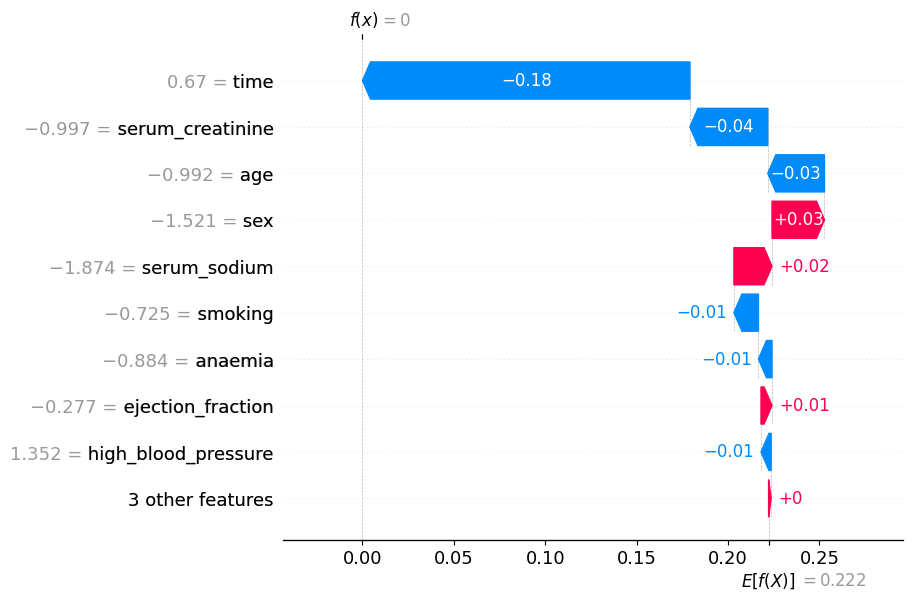

In [167]:
shap.plots.waterfall(shap_values[0])

In [106]:
#test with SMOTE

warnings.filterwarnings("ignore", category=UserWarning)

explainer = shap.Explainer(logistic.predict, X_test_sm_named)
shap_values = explainer(X_test_sm_named)

In [107]:
np.shape(shap_values.values)

(76, 12)

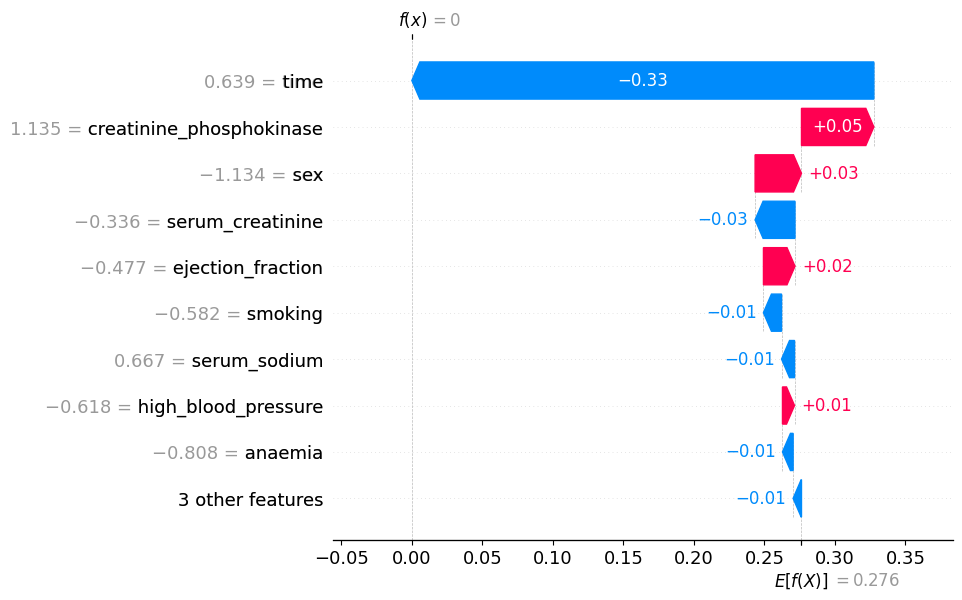

In [108]:
shap.plots.waterfall(shap_values[0])

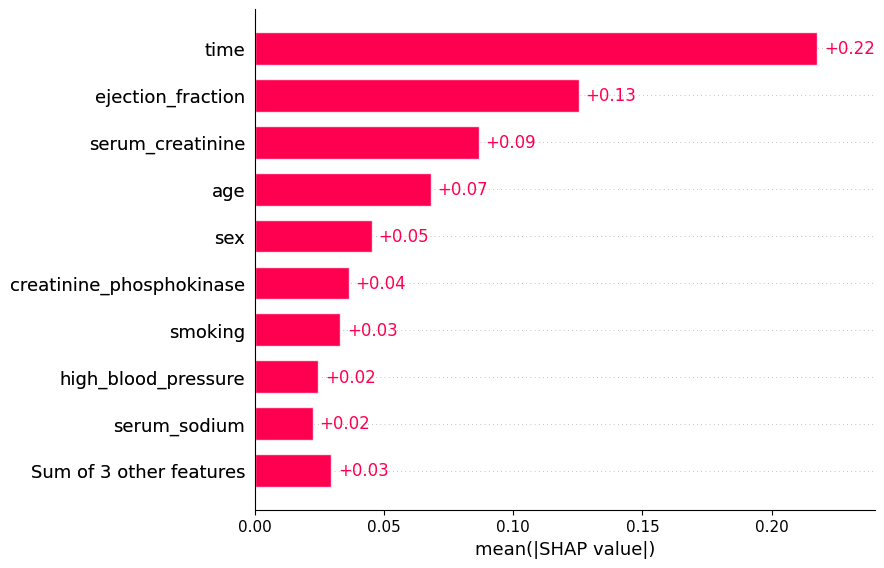

In [109]:
shap.plots.bar(shap_values)

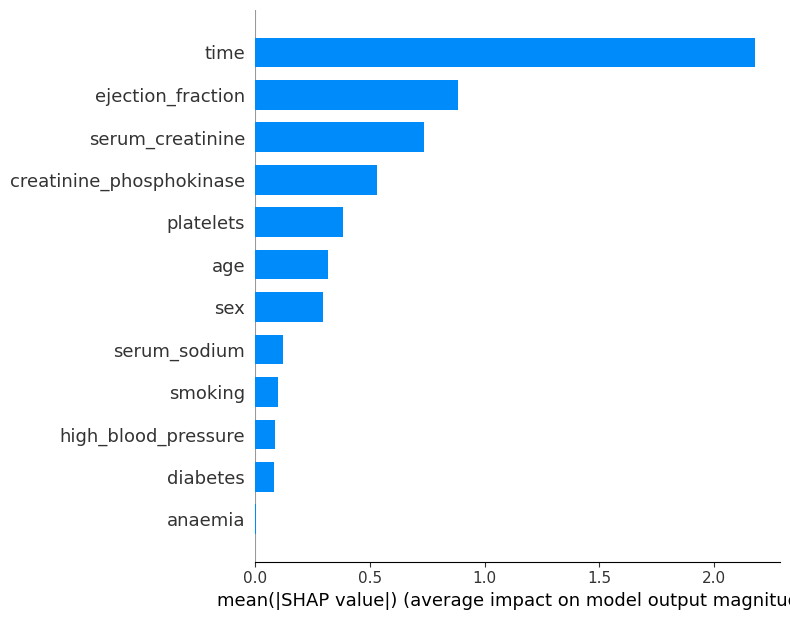

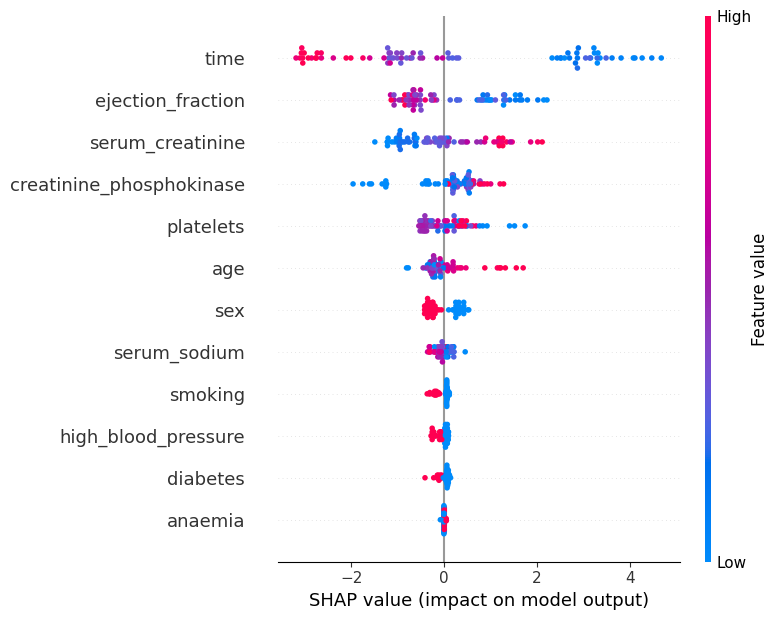

In [168]:
#SHAP for gradient boosting
explainer_tree = shap.TreeExplainer(gbm_model)
shap_values = explainer_tree.shap_values(X_test_sm_named)

shap.summary_plot(shap_values, X_test_sm_named, plot_type='bar')

shap.summary_plot(shap_values, X_test_sm_named)

In [111]:
#shap summary plot for logistic regression
explainer_logistic = shap.KernelExplainer(logistic.predict_proba, X_test_sm_named)
shap_values_logistic = explainer_logistic.shap_values(X_test_sm_named)

100%|██████████| 76/76 [00:23<00:00,  3.18it/s]


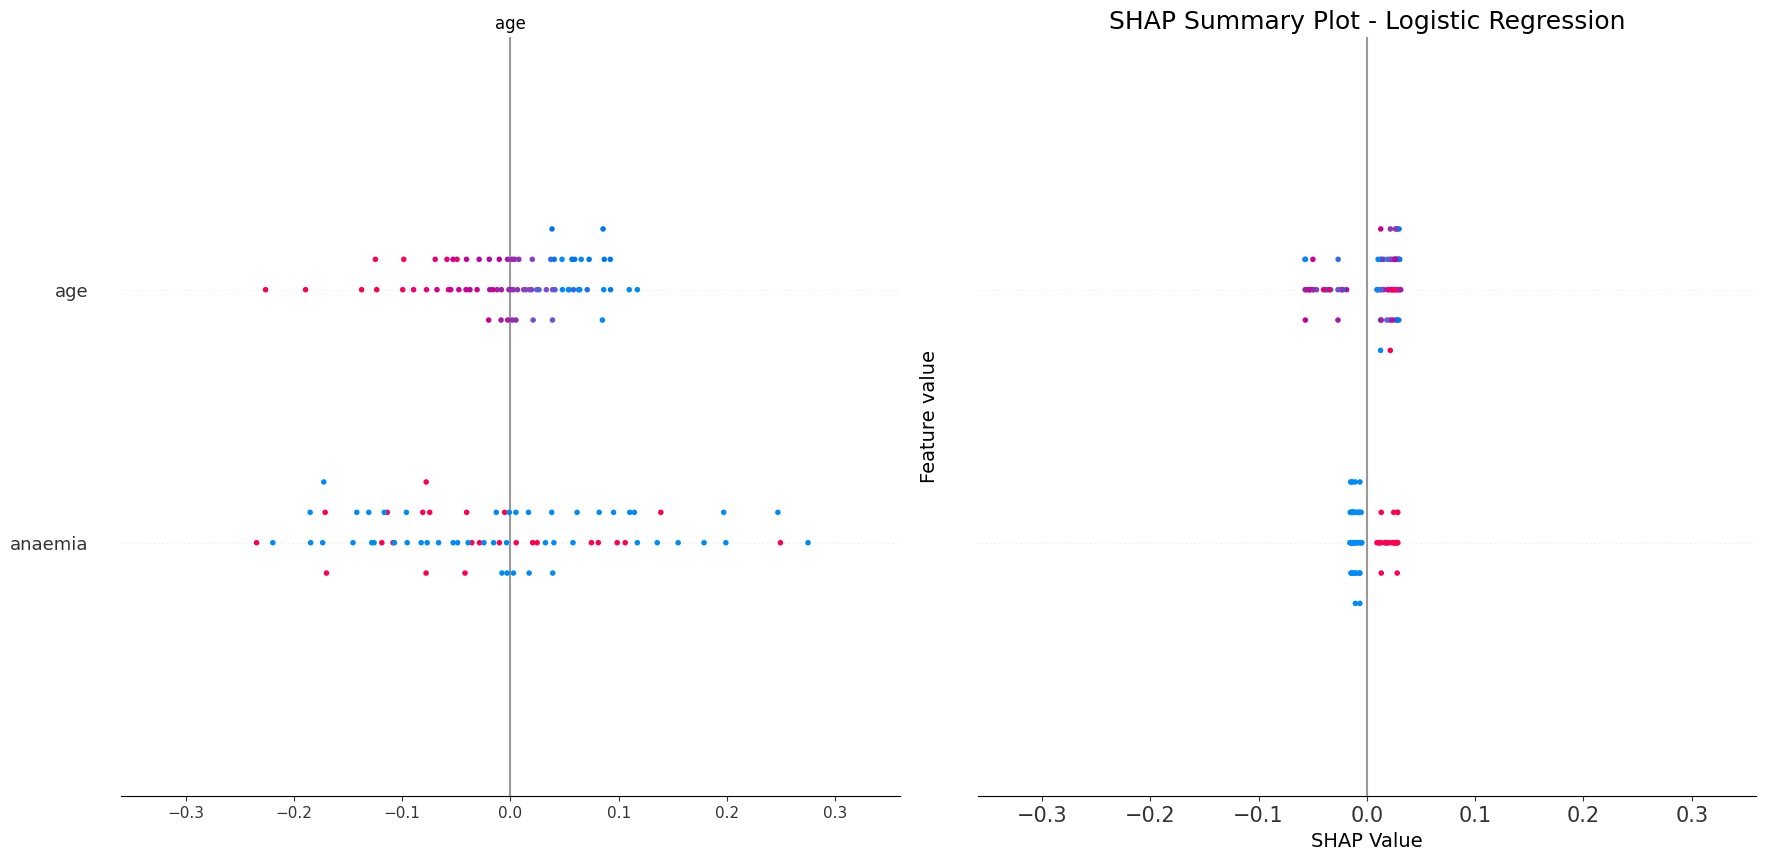

In [172]:
#plot with each feature on the chart
shap.summary_plot(shap_values_logistic, X_test_sm_named,  plot_type='bar', max_display=None, show=False)

#shap.summary_plot(shap_values_logistic, X_test_sm_named, max_display=20, show=False)
fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=14)
ax.set_title('SHAP Summary Plot - Logistic Regression', fontsize=18)

#set size
#fig.set_size_inches(12, 6.5, forward=True)
fig.set_size_inches(65.5, 8.5, forward=True)
# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=15)
cb_ax.set_xlabel("SHAP Value", fontsize=14)
cb_ax.set_ylabel("Feature value", fontsize=14)
plt.show()


In [ ]:
#I need some help after this line.
#can;t suppress the output

In [ ]:
from contextlib import redirect_stdout

In [165]:
#shap summary plot for ANN
warnings.filterwarnings("ignore", category=UserWarning)
explainer_ann = shap.KernelExplainer(model.predict, X_test_sm_named, link="logit")
shap_values_ann = explainer_ann.shap_values(X_test_sm_named, quiet=True)

with redirect_stdout(None):
    shap.summary_plot(shap_values_ann, X_test_sm_named, max_display=20, show=True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


  0%|          | 0/76 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
 107/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 476us/step 

4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 479us/step


  1%|▏         | 1/76 [00:04<05:12,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 463us/step


  3%|▎         | 2/76 [00:08<05:04,  4.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 464us/step


  4%|▍         | 3/76 [00:12<04:59,  4.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 466us/step


  5%|▌         | 4/76 [00:16<04:55,  4.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 463us/step


  7%|▋         | 5/76 [00:20<04:50,  4.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 465us/step


  8%|▊         | 6/76 [00:24<04:47,  4.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 485us/step


  9%|▉         | 7/76 [00:28<04:45,  4.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 469us/step


 11%|█         | 8/76 [00:33<04:43,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 481us/step


 12%|█▏        | 9/76 [00:37<04:41,  4.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 3s 517us/step


 13%|█▎        | 10/76 [00:41<04:42,  4.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 489us/step


 14%|█▍        | 11/76 [00:46<04:38,  4.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 470us/step


 16%|█▌        | 12/76 [00:50<04:37,  4.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 477us/step


 17%|█▋        | 13/76 [00:54<04:30,  4.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 473us/step


 18%|█▊        | 14/76 [00:59<04:25,  4.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 475us/step


 20%|█▉        | 15/76 [01:03<04:20,  4.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 470us/step


 21%|██        | 16/76 [01:07<04:13,  4.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 469us/step


 22%|██▏       | 17/76 [01:11<04:08,  4.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 471us/step


 24%|██▎       | 18/76 [01:15<04:03,  4.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 471us/step


 25%|██▌       | 19/76 [01:19<03:58,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 473us/step


 26%|██▋       | 20/76 [01:24<03:54,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step


 28%|██▊       | 21/76 [01:28<03:48,  4.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 470us/step


 29%|██▉       | 22/76 [01:32<03:44,  4.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 489us/step


 30%|███       | 23/76 [01:36<03:42,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step


 32%|███▏      | 24/76 [01:40<03:36,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 466us/step


 33%|███▎      | 25/76 [01:44<03:33,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 482us/step


 34%|███▍      | 26/76 [01:49<03:29,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 3s 503us/step


 36%|███▌      | 27/76 [01:53<03:28,  4.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 501us/step


 37%|███▋      | 28/76 [01:57<03:25,  4.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 3s 513us/step


 38%|███▊      | 29/76 [02:02<03:22,  4.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step


 39%|███▉      | 30/76 [02:06<03:17,  4.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 464us/step


 41%|████      | 31/76 [02:10<03:10,  4.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 473us/step


 42%|████▏     | 32/76 [02:14<03:05,  4.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 3s 550us/step


 43%|████▎     | 33/76 [02:19<03:08,  4.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 466us/step


 45%|████▍     | 34/76 [02:23<03:00,  4.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 457us/step


 46%|████▌     | 35/76 [02:27<02:53,  4.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 461us/step


 47%|████▋     | 36/76 [02:31<02:48,  4.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 459us/step


 49%|████▊     | 37/76 [02:36<02:42,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 452us/step


 50%|█████     | 38/76 [02:40<02:37,  4.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 461us/step


 51%|█████▏    | 39/76 [02:44<02:32,  4.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step


 53%|█████▎    | 40/76 [02:48<02:28,  4.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 453us/step


 54%|█████▍    | 41/76 [02:52<02:23,  4.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 471us/step


 55%|█████▌    | 42/76 [02:56<02:20,  4.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 464us/step


 57%|█████▋    | 43/76 [03:00<02:16,  4.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 453us/step


 58%|█████▊    | 44/76 [03:04<02:11,  4.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 470us/step


 59%|█████▉    | 45/76 [03:08<02:08,  4.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step


 61%|██████    | 46/76 [03:13<02:03,  4.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 462us/step


 62%|██████▏   | 47/76 [03:17<01:59,  4.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 454us/step


 63%|██████▎   | 48/76 [03:21<01:55,  4.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 454us/step


 64%|██████▍   | 49/76 [03:25<01:50,  4.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 463us/step


 66%|██████▌   | 50/76 [03:29<01:46,  4.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 471us/step


 67%|██████▋   | 51/76 [03:33<01:44,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step


 68%|██████▊   | 52/76 [03:37<01:39,  4.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 452us/step


 70%|██████▉   | 53/76 [03:41<01:35,  4.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 452us/step


 71%|███████   | 54/76 [03:46<01:31,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 470us/step


 72%|███████▏  | 55/76 [03:50<01:28,  4.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step


 74%|███████▎  | 56/76 [03:54<01:23,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 466us/step


 75%|███████▌  | 57/76 [03:58<01:19,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 3s 507us/step


 76%|███████▋  | 58/76 [04:03<01:16,  4.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 491us/step


 78%|███████▊  | 59/76 [04:07<01:12,  4.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 465us/step


 79%|███████▉  | 60/76 [04:11<01:07,  4.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 456us/step


 80%|████████  | 61/76 [04:15<01:02,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 454us/step


 82%|████████▏ | 62/76 [04:19<00:57,  4.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 464us/step


 83%|████████▎ | 63/76 [04:23<00:53,  4.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 493us/step


 84%|████████▍ | 64/76 [04:28<00:49,  4.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 461us/step


 86%|████████▌ | 65/76 [04:32<00:45,  4.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step


 87%|████████▋ | 66/76 [04:36<00:41,  4.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 456us/step


 88%|████████▊ | 67/76 [04:40<00:36,  4.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step


 89%|████████▉ | 68/76 [04:44<00:32,  4.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 461us/step


 91%|█████████ | 69/76 [04:48<00:28,  4.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 497us/step


 92%|█████████▏| 70/76 [04:52<00:25,  4.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 475us/step


 93%|█████████▎| 71/76 [04:57<00:20,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 473us/step


 95%|█████████▍| 72/76 [05:01<00:16,  4.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 457us/step


 96%|█████████▌| 73/76 [05:05<00:12,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 467us/step


 97%|█████████▋| 74/76 [05:09<00:08,  4.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 2s 472us/step


 99%|█████████▊| 75/76 [05:13<00:04,  4.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 3s 515us/step


100%|██████████| 76/76 [05:18<00:00,  4.19s/it]


AttributeError: 'NoneType' object has no attribute 'flush'